##REGRESION LINEAL

##Deibys Alejandro Cabeza Mendoza

##ANÁLISIS DE DATOS - (202016908A_1704)

In [5]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("car data.csv")
data.head()
data = pd.read_csv("car details v4.csv")
data.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [22]:
data.shape

(2059, 20)

In [24]:
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [26]:
data.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

(array([  1.,   0.,   1.,   1.,   2.,  21., 139., 590., 717., 587.]),
 array([1988. , 1991.4, 1994.8, 1998.2, 2001.6, 2005. , 2008.4, 2011.8,
        2015.2, 2018.6, 2022. ]),
 <BarContainer object of 10 artists>)

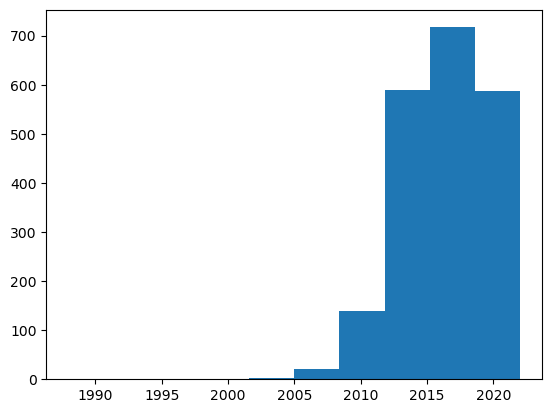

In [28]:
plt.hist(data.Year)

<Axes: xlabel='Price', ylabel='Year'>

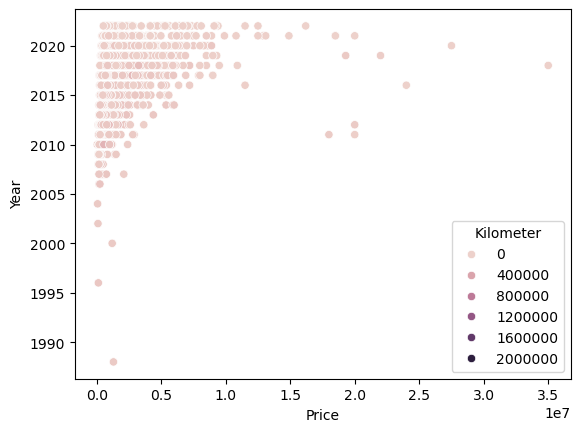

In [30]:
sns.scatterplot(x = "Price", y = "Year", hue = "Kilometer", data = data)

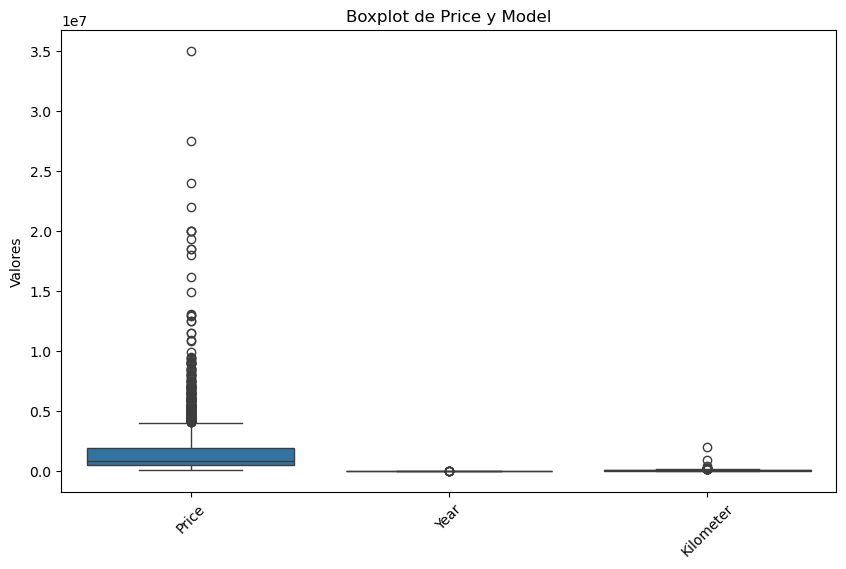

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Price', 'Year', 'Kilometer', 'Model']])
plt.xticks(rotation=45)
plt.title('Boxplot de Price y Model')
plt.ylabel('Valores')
plt.show()

In [36]:
predictors_col = ["Price", "Year", "Kilometer", "Model"]
target_col = ['Price']

In [40]:
predictors = data[predictors_col]
target = data[target_col]

In [42]:
predictors

,Price,Year,Kilometer,Length
0,505000,2017,87150,3990.0
1,450000,2014,75000,3995.0
2,220000,2011,67000,3585.0
3,799000,2019,37500,3995.0
4,1950000,2018,69000,4735.0
...,...,...,...,...
2054,850000,2016,90300,4585.0
2055,275000,2014,83000,3495.0
2056,240000,2013,73000,3795.0
2057,4290000,2018,60474,4936.0


In [44]:
target

,Price
0,505000
1,450000
2,220000
3,799000
4,1950000
...,...
2054,850000
2055,275000
2056,240000
2057,4290000


In [46]:
corr = predictors.corr()
corr

,Price,Year,Kilometer,Length
Price,1.000000,0.311400,-0.150825,0.556741
Year,0.311400,1.000000,-0.296547,0.098770
Kilometer,-0.150825,-0.296547,1.000000,0.047705
Length,0.556741,0.098770,0.047705,1.000000


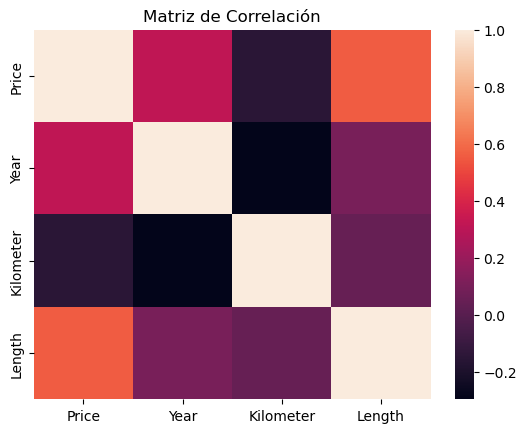

In [48]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [52]:
tree = DecisionTreeClassifier()

In [54]:
arbol = tree.fit(X_train, y_train)

[Text(0.23646711599049514, 0.9868421052631579, 'x[0] <= 450500.0\ngini = 0.996\nsamples = 1647\nvalue = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0\n3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 4.0, 2.0, 1.0\n1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 6.0, 1.0, 1.0, 3.0\n1.0, 7.0, 5.0, 7.0, 2.0, 11.0, 3.0, 4.0, 5.0, 1.0\n5.0, 11.0, 4.0, 5.0, 1.0, 1.0, 4.0, 9.0, 1.0, 10.0\n4.0, 1.0, 1.0, 5.0, 7.0, 1.0, 3.0, 12.0, 1.0, 1.0\n1.0, 3.0, 4.0, 1.0, 7.0, 10.0, 1.0, 2.0, 5.0, 10.0\n1.0, 2.0, 16.0, 2.0, 4.0, 8.0, 11.0, 1.0, 3.0, 3.0\n11.0, 1.0, 7.0, 1.0, 4.0, 1.0, 2.0, 1.0, 17.0, 4.0\n1.0, 8.0, 1.0, 2.0, 7.0, 17.0, 1.0, 2.0, 6.0, 6.0\n3.0, 12.0, 3.0, 7.0, 7.0, 1.0, 8.0, 2.0, 9.0, 1.0\n5.0, 1.0, 2.0, 3.0, 12.0, 1.0, 2.0, 4.0, 3.0, 9.0\n1.0, 4.0, 14.0, 3.0, 2.0, 4.0, 2.0, 7.0, 1.0, 3.0\n16.0, 4.0, 5.0, 9.0, 2.0, 8.0, 1.0, 1.0, 7.0, 1.0\n1.0, 3.0, 2.0, 3.0, 19.0, 1.0, 3.0, 1.0, 1.0, 1.0\n4.0, 1.0, 7.0, 2.0, 18.0, 1.0, 2.0, 1.0, 2.0, 1.0\n1.0, 1.0, 16.0, 1.0, 7.0, 9.0, 1.0, 11.0, 5.0, 4.0\n2.0, 1.0, 3.0, 1.0, 1.0, 1

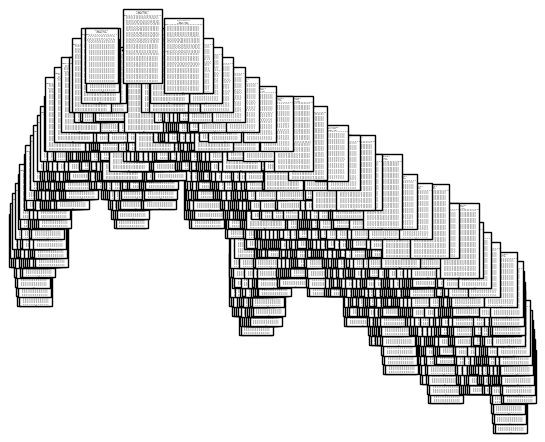

In [56]:
plot_tree(arbol)

In [57]:
predicciones = arbol.predict(X_test)

In [58]:
predicciones

array([ 1075000,  2650000,   950000,   325000,  2180000,   875000,
         750000,  1225000,   345000,   275000,   590000,   770000,
         409999,  1275000,  1789999,  2950000,   849000,  2400000,
        1475000,  1750000,   994999,   580000,  2800000,  2050000,
         425000,  9900000,   675000,   425000,  1700000,   650000,
         611000,   535000,  1350000,  1689999,   715000,   480000,
        1095000,  2690000,   650000,   335000,   495000,   560000,
        2275000,  1180000,   545000,   545000,  4475000,   450000,
         195000,   580000,   425000,   560000,   951000,  6875000,
         490000,   795000,  6800000, 10800000,  5900000,  1475000,
        5811000,  1839000,  1950000,   570000,   340000,   690000,
         850000,  2375000,   425000,   310000,  1390000,  1375000,
         335000,   160000,   350000,   140000,   450000,  2990000,
         950000,  2250000,  3990000,  1260000,   425000,   319000,
        5300000,   325000,   960000,  3750000,   849000,  6100

In [59]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,120000,140000,141000,145000,155000,160000,175000,178000,185000,190000,...,6800000,6875000,7000000,7700000,8000000,8900000,9900000,10800000,13000000,35000000
Actual,,,,,,,,,,,,,,,,,,,,,
49000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120000,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150000,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160000,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.7524271844660194

In [61]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

C:\Users\DEIVIS CABEZA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.7312162891046387

In [62]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

C:\Users\DEIVIS CABEZA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.7524271844660194

In [63]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.7361558343316886